In [10]:
from utils.analysis.datacard import DataCard
dc = DataCard("MX_500_MY_300")
dc.write()
dc.write_additions()
dc.write_removals()
dc = DataCard("MX_1000_MY_800")
dc.write()
dc.write_additions()
dc.write_removals()
dc = DataCard("MX_850_MY_350")
dc.write()
dc.write_additions()
dc.write_removals()

OBJECTIVE: Obtain nominal TF as function of MX and also for each variation

In [6]:
def read_cfg(cfg):
    config = ConfigParser()
    config.optionxform = str
    config.read(cfg)
    return config

In [4]:
from utils.analysis.feyn import model_path
model_dir = model_path.split('/')[-3]
# model_savein = f'plots/feynnet/{model_dir}'

In [57]:
data = Data('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/JetHT_Data_UL/ntuple.root')
data.spherical_region()
data.train()

[13:52:44] Loading                                                 ]8;id=641988;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=832719;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#100\100]8;;\
           Summer2018UL/maxbtag_4b/JetHT_Data_UL/ntuple.root...                 
[13:52:49] Loading                                                 ]8;id=645264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=475946;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#179\179]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_o              
           fficial/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e22              
           6783a7d1c9db_ranger_lr0.0047

n_target = [  2  17  44  92 137 186 173 176 176 129 156 105  91  80  71  55  35  31
  19  22   9  10   3   6   1   1   3   0   0   1]
n_pred = [  2.  11.  44.  80. 136. 168. 195. 197. 173. 143. 118. 115.  89.  78.
  57.  45.  36.  30.  20.  16.   9.   4.   4.   5.   2.   1.   2.   1.
   1.   1.]
[1.10012063 1.55850422 1.00148912 1.15449921 1.00701465 1.10806374
 0.88521334 0.89363645 1.01727442 0.90200568 1.32014475 0.91434828
 1.02502707 1.03136309 1.23981848 1.22648583 0.96260555 1.03344665
 0.96472117 1.34459188 0.95816958 2.53873991 0.82509047 1.32014475
 0.47148027 0.82509047 1.98021713 0.         0.         1.65018094]
[1.10012063 1.55850422 1.00148912 1.15449921 1.00701465 1.10806374
 0.88521334 0.89363645 1.01727442 0.90200568 1.32014475 0.91434828
 1.02502707 1.03136309 1.23981848 1.22648583 0.96260555 1.03344665
 0.96472117 1.34459188 0.95816958 2.53873991 0.82509047 1.32014475
 0.47148027 0.82509047 1.98021713 0.         0.         1.65018094]
n_target = [  2  17  44  92 137

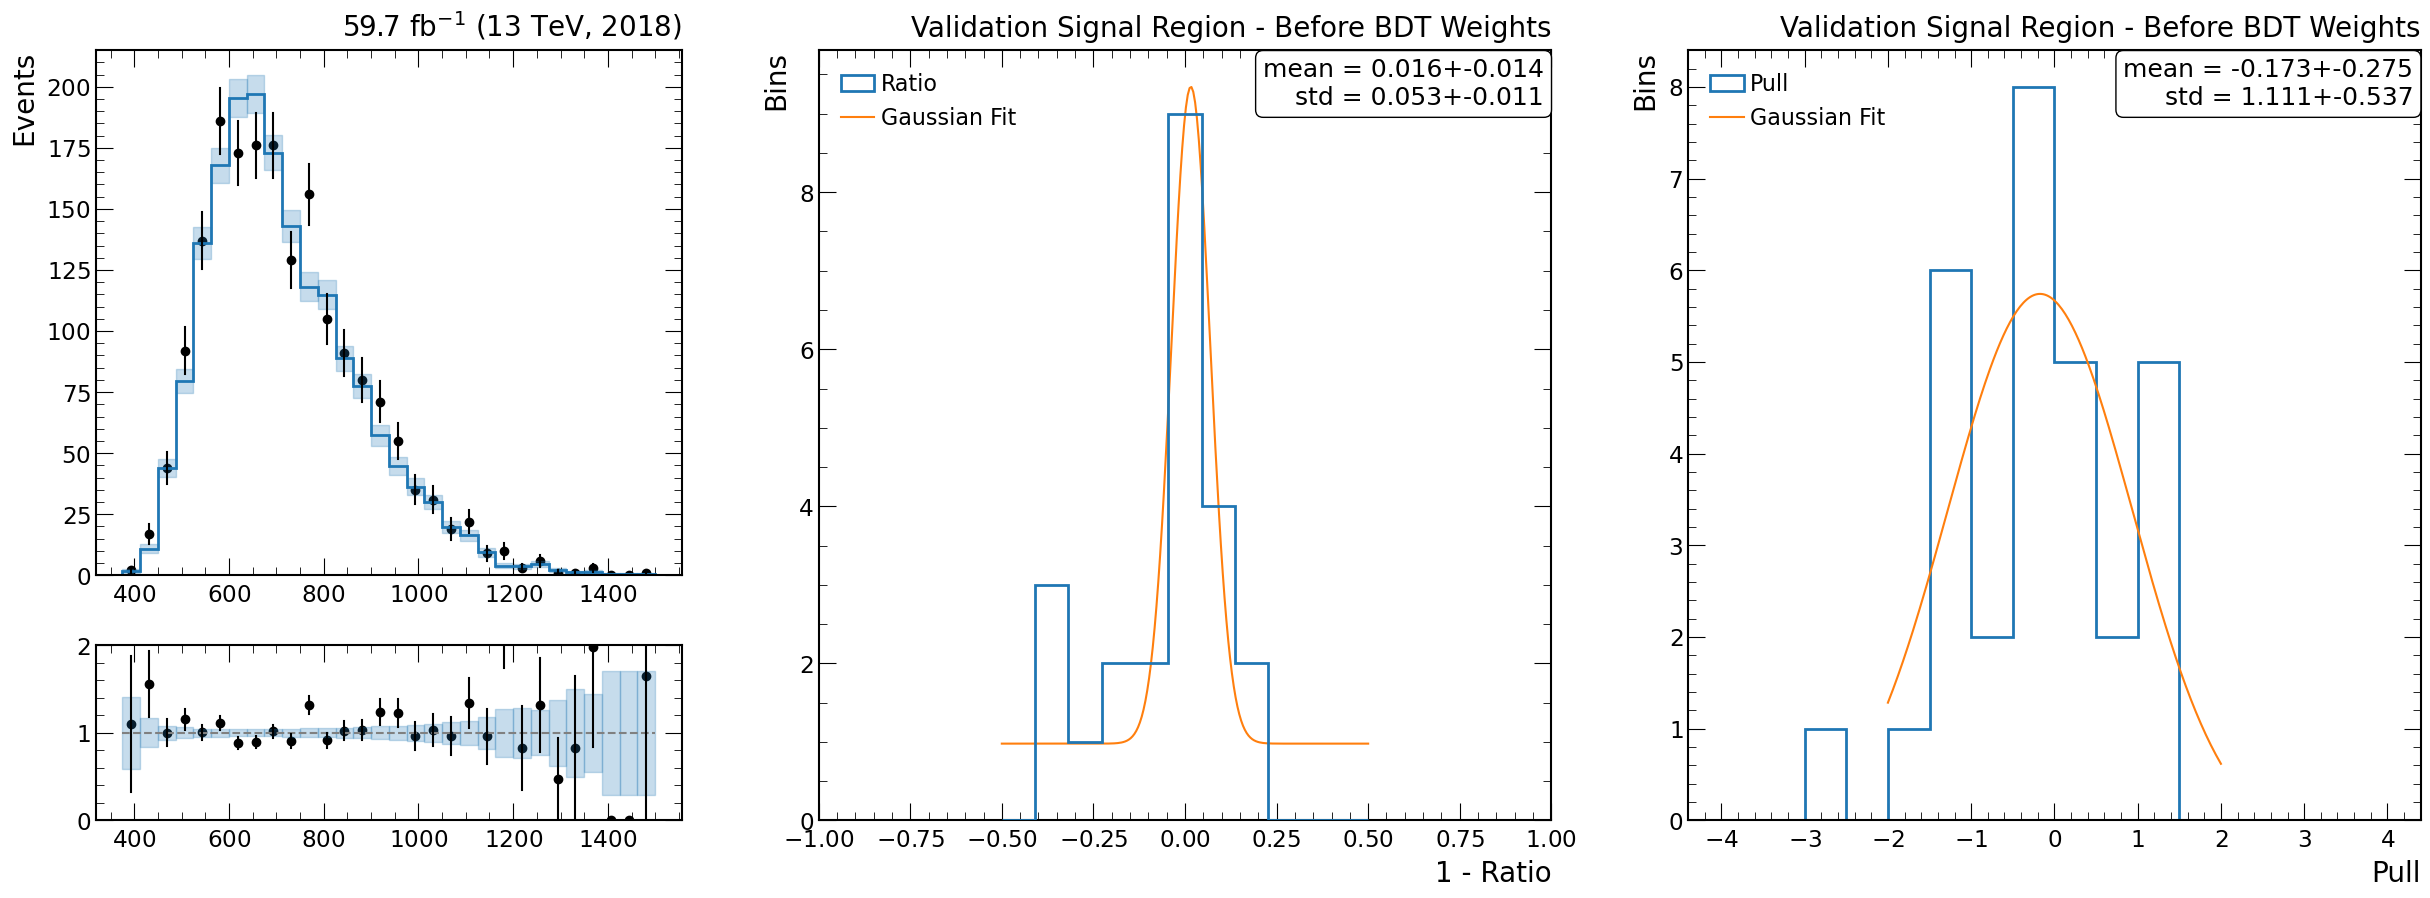

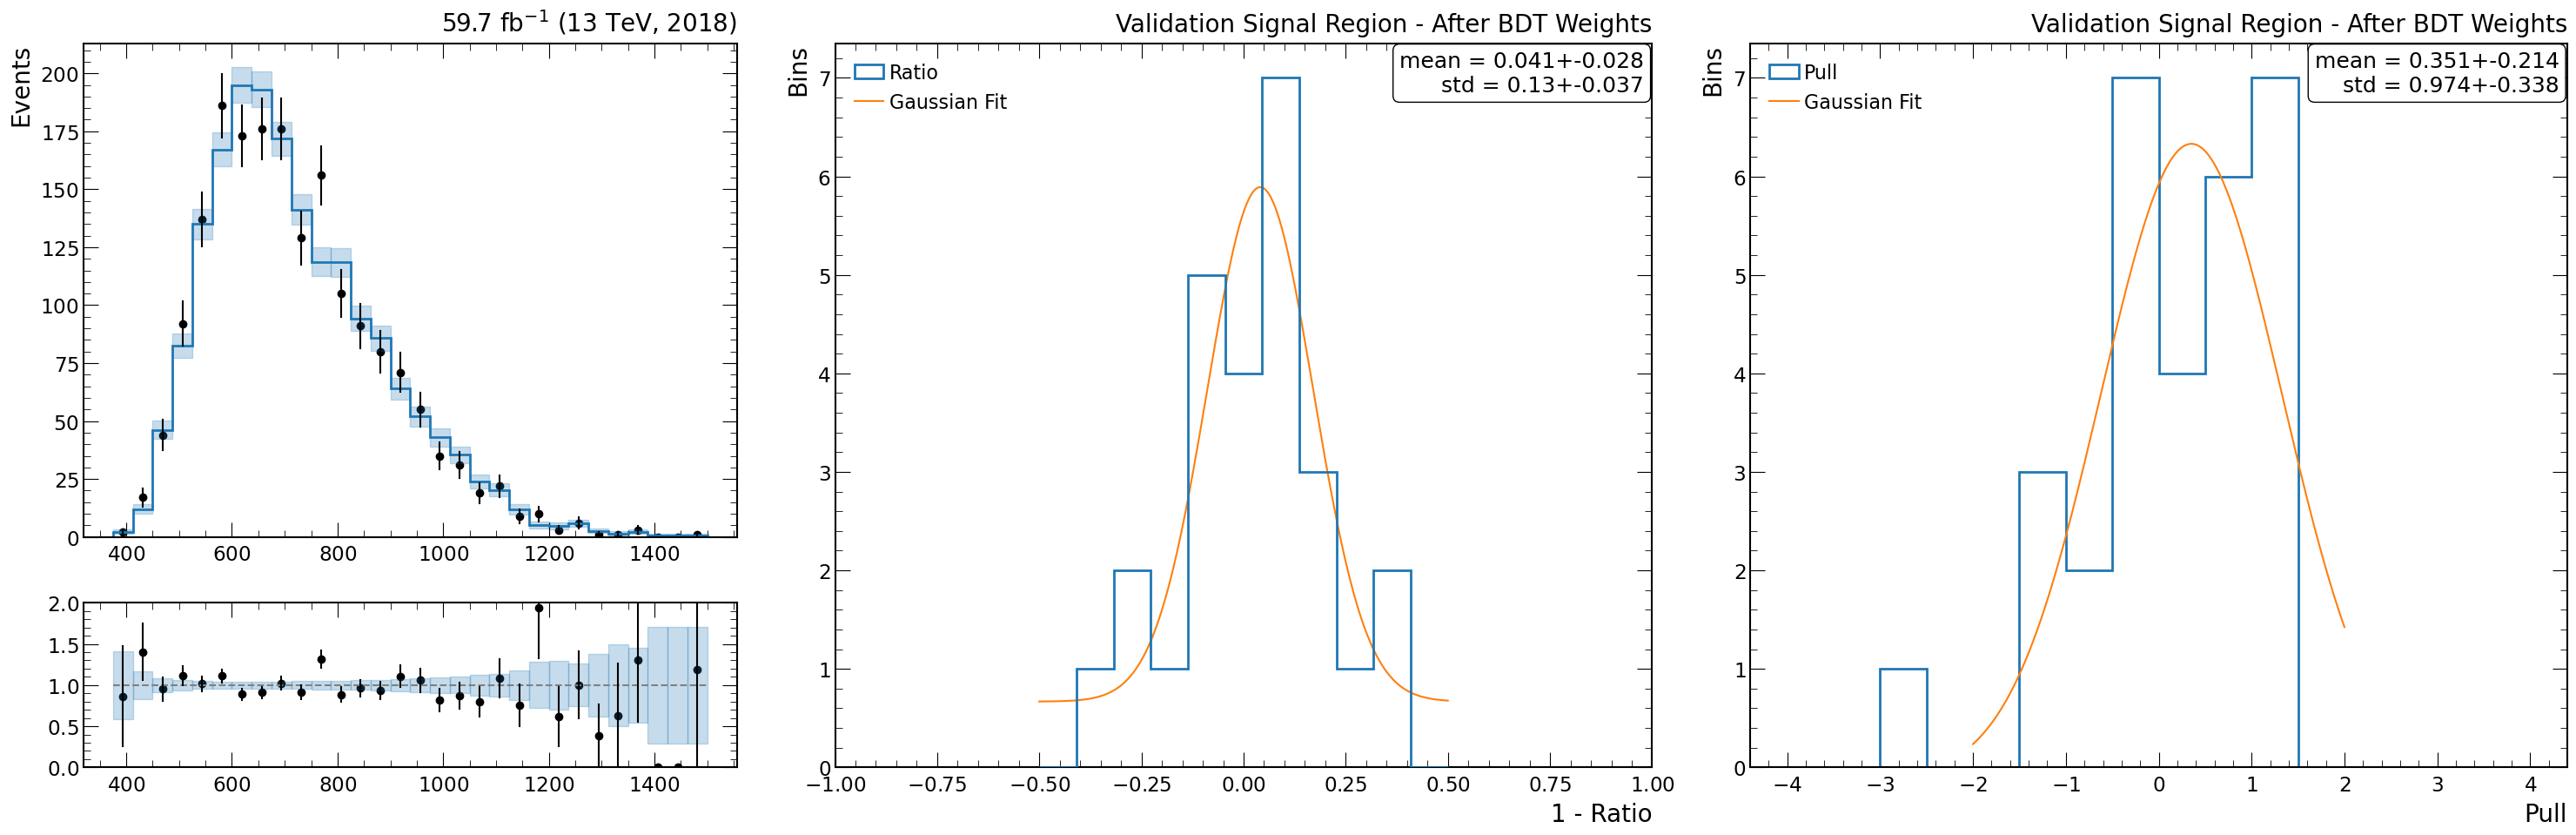

In [61]:
data.pull_plots()

In [ ]:
from configparser import ConfigParser
config = read_cfg("config/bdt_params.cfg")
config['spherical']['CRedge'] = '40'
cr_up = Data('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/JetHT_Data_UL/ntuple.root', cfg=config)
cr_up.spherical_region()
n_cr_up_acr = sum(cr_up.acr_mask)
cr_up.train()
fig, ax, n_cr_up = cr_up.sr_hist()

In [ ]:
def ratio(top, bottom, mh, ls_mask, hs_mask, weights, bins, color):
    """top, bottom are axes"""
    x =bins[:-1] + np.diff(bins)/2

    n_pred = Hist(mh[ls_mask], bins=bins, ax=top, label='VSR Predicted', weights=weights, color=color)
    n_pred = Hist(mh[ls_mask], bins=bins, ax=top, weights=weights, color=color, histtype='stepfilled', alpha=0.5)
    n_obs, e = np.histogram(mh[hs_mask], bins=bins)
    top.scatter(x, n_obs, label='VSR Observed', color='k')
    top.legend()
    top.set_ylabel('Events')

    ratio = n_obs/n_pred
    ratio = np.where(n_pred == n_obs, 1, ratio)
    bottom.scatter(x, ratio, color='k')
    bottom.set_ylim(0.6,1.4)
    bottom.set_ylabel('Data/Model')
    return ratio

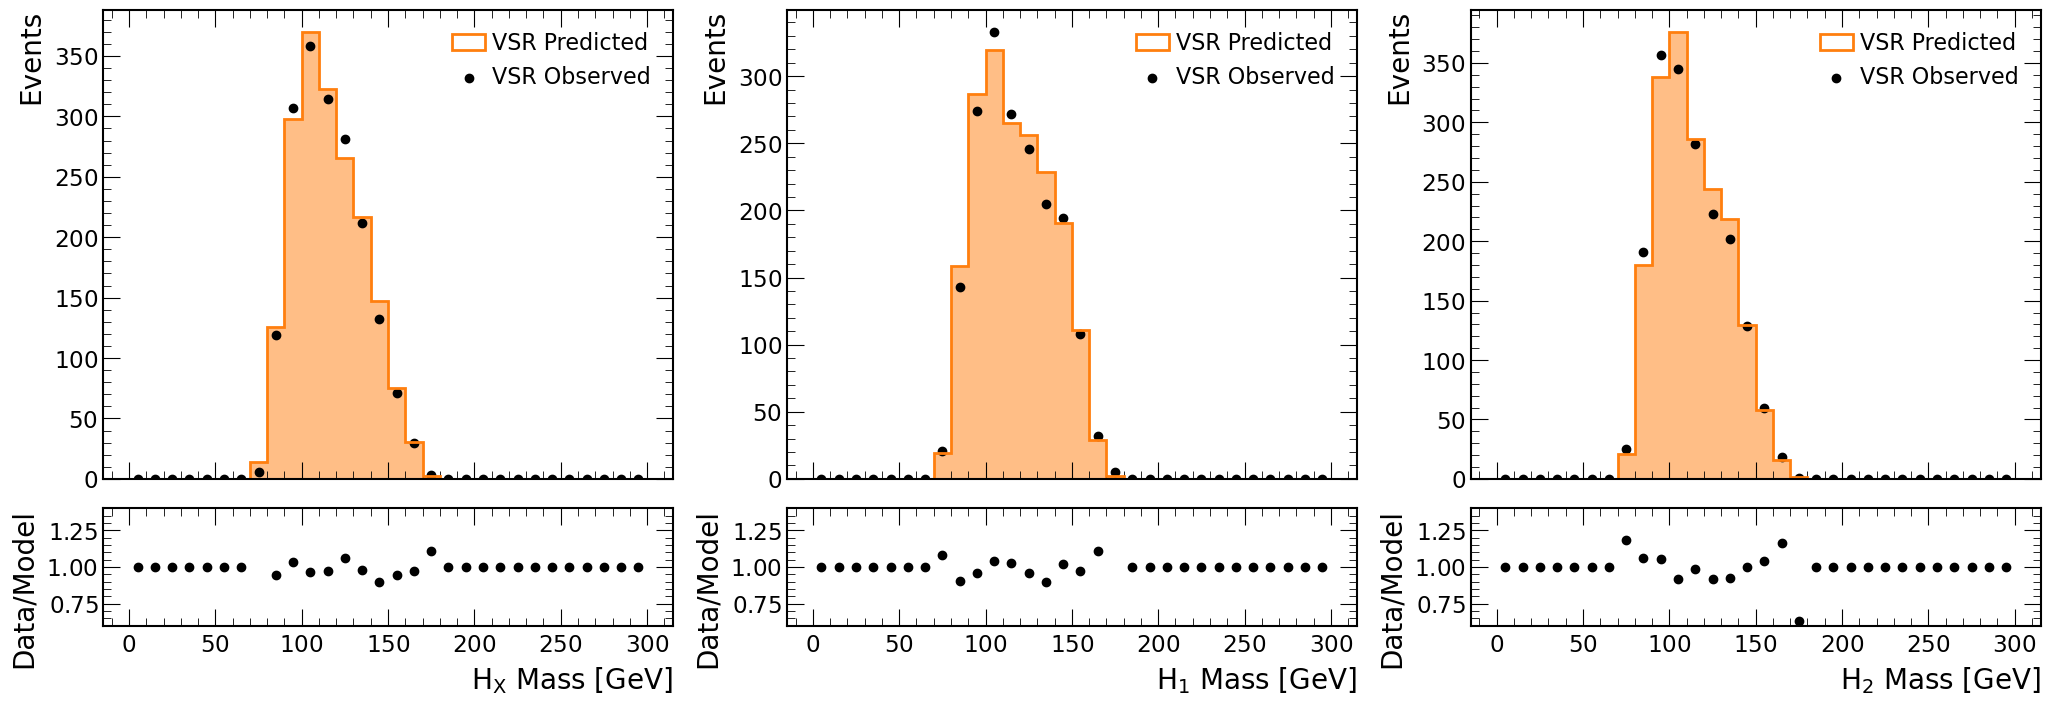

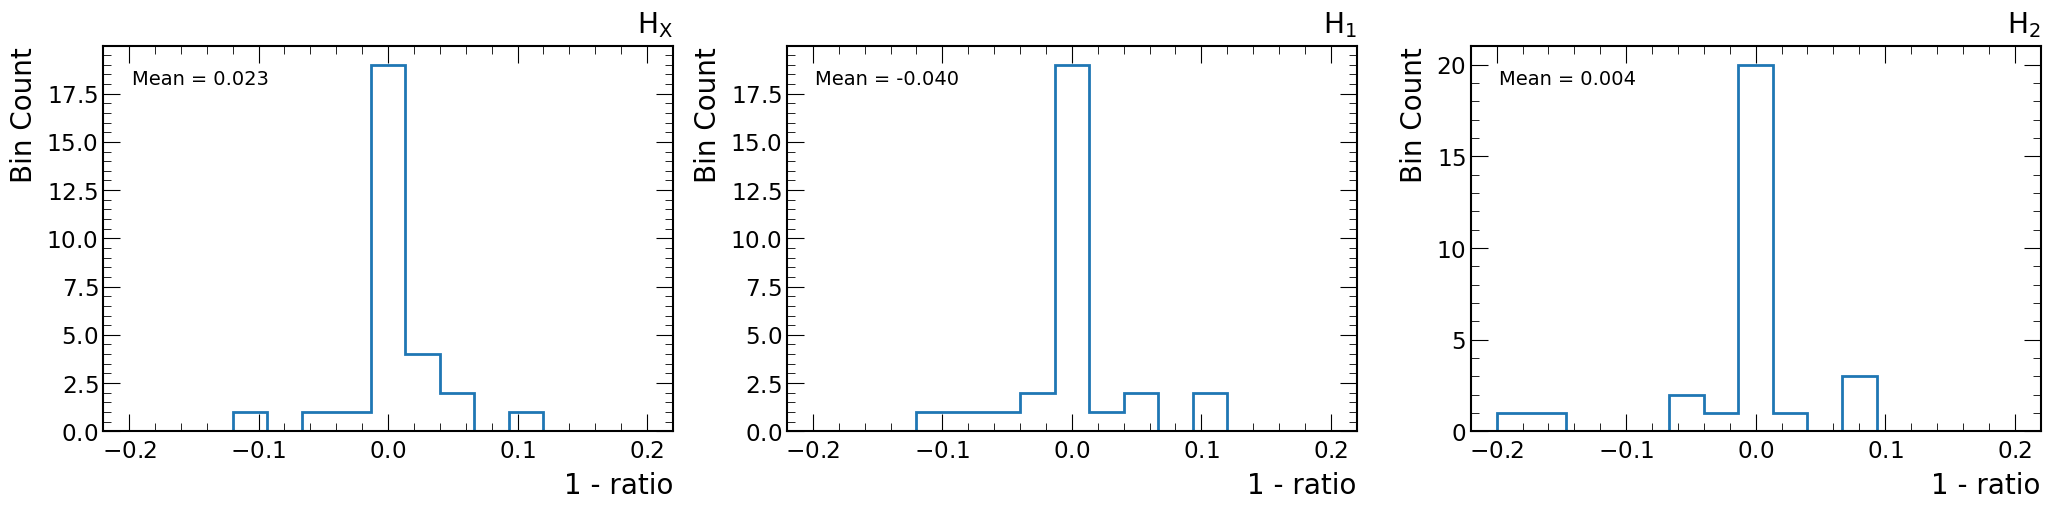

In [84]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,8), gridspec_kw={'height_ratios':[4,1], 'hspace':0.1}, sharex=True)
bins = np.linspace(0, 300, 31)
x = bins[:-1] + np.diff(bins)/2

r_hx = ratio(axs[0][0], axs[1][0], data.HX.m, data.vsr_ls_mask, data.vsr_hs_mask, data.vsr_weights, bins, color='C1')
r_h1 = ratio(axs[0][1], axs[1][1], data.H1.m, data.vsr_ls_mask, data.vsr_hs_mask, data.vsr_weights, bins, color='C1')
r_h2 = ratio(axs[0][2], axs[1][2], data.H2.m, data.vsr_ls_mask, data.vsr_hs_mask, data.vsr_weights, bins, color='C1')

axs[1][0].set_xlabel(r'$H_X$ Mass [GeV]')
axs[1][1].set_xlabel(r'$H_1$ Mass [GeV]')
axs[1][2].set_xlabel(r'$H_2$ Mass [GeV]')
fig.savefig('plots/systematics/bkg_model/normalization/vsr_mh_ratios.pdf', bbox_inches='tight')

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25,5))
bins = np.linspace(-0.2,0.2,16)
n = Hist(1-r_hx, bins=bins, ax=axs[0])
n = Hist(1-r_h1, bins=bins, ax=axs[1])
n = Hist(1-r_h2, bins=bins, ax=axs[2])

means = [np.average(1-r_hx), np.average(1-r_h1), np.average(1-r_h2)]

for ax,hx,m in zip(axs,[r'$H_X$',r'$H_1$',r'$H_2$'], means):
    ax.set_xlabel('1 - ratio')
    ax.set_ylabel('Bin Count')
    ax.set_title(hx)
    ax.text(0.05, 0.9, f'Mean = {m:.3f}', transform=ax.transAxes, fontsize=14)
fig.savefig('plots/systematics/bkg_model/normalization/vsr_mh_1-ratio.pdf', bbox_inches='tight')

In [65]:
import uproot
f = uproot.open("combine/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/model.root")

In [68]:
nom, b = f['model'].to_numpy()
cr_up, b = f['model_CRShiftUp'].to_numpy()
cr_down, b = f['model_CRShiftDown'].to_numpy()
btag_up, b = f['model_AvgBTagUp'].to_numpy()
btag_down, b = f['model_AvgBTagDown'].to_numpy()

x = b[:-1] + np.diff(b)/2

In [74]:
btag_up, btag_down

(array([ 0.97872969,  5.73025765, 21.98031267, 41.45645053, 65.06530448,
        70.07752406, 71.87529803, 71.26238405, 60.95280777, 52.7071348 ,
        41.94404159, 36.48433009, 27.96097871, 26.16988484, 27.77054996,
        14.08171118, 13.55180271,  9.95768143,  7.55884748,  3.91680429,
         2.41993599,  2.64336436,  1.74780616,  0.70479994,  0.        ,
         1.00728654,  0.38247567,  0.        ,  0.        ,  0.40382945]),
 array([ 0.94643494,  4.61794494, 16.34234707, 31.82070798, 49.53597986,
        57.62415094, 60.26515912, 61.94975926, 53.77022702, 45.93130598,
        33.4741612 , 29.42692176, 23.56474637, 19.08813866, 19.67995596,
         9.83539014,  9.33497701,  7.12494425,  4.79105197,  2.01993654,
         1.20583168,  1.98242805,  0.86164171,  0.54118396,  0.        ,
         0.66228185,  0.2095912 ,  0.        ,  0.        ,  0.25609814]))

Text(1, 0, '$M_X$ [GeV]')

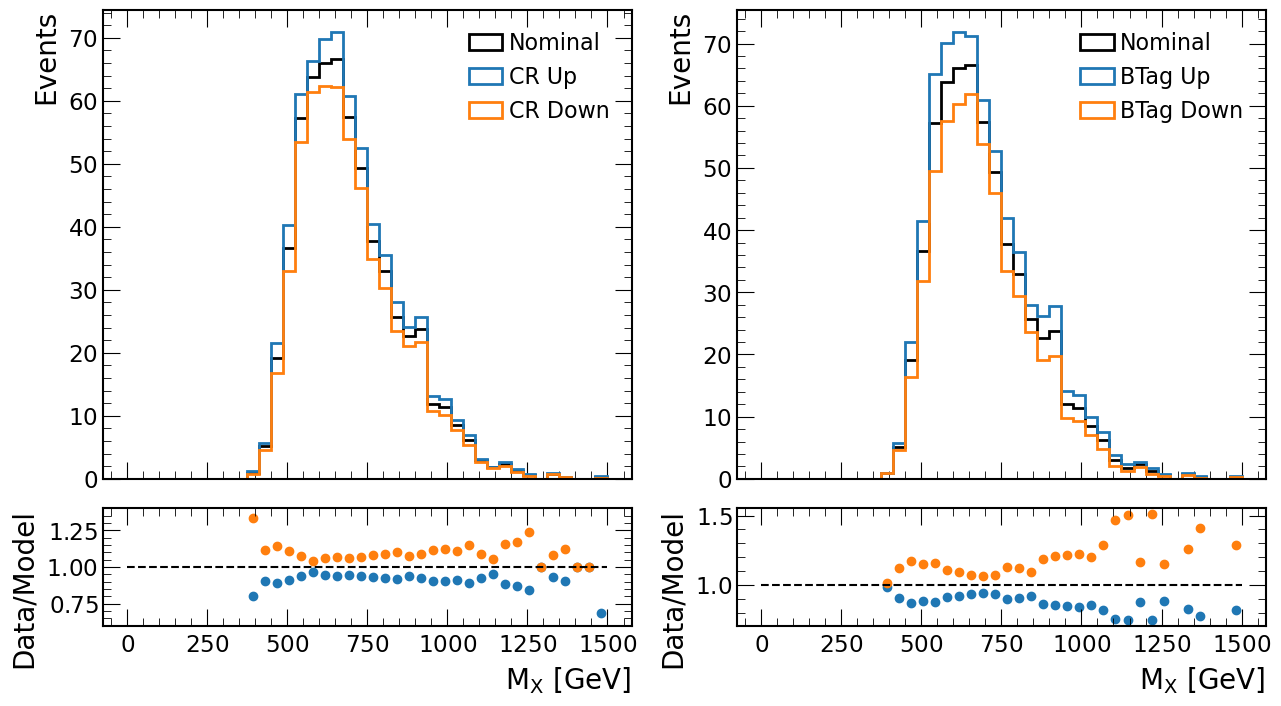

In [75]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,8), gridspec_kw={'height_ratios':[4,1], 'hspace':0.1}, sharex=True)

ax = axs[0][0]
Hist(x, weights=nom, bins=b, ax=ax, label='Nominal', color='k')
Hist(x, weights=cr_up, bins=b, ax=ax, label='CR Up', color='C0')
Hist(x, weights=cr_down, bins=b, ax=ax, label='CR Down', color='C1')
ax.set_ylabel('Events')


ax = axs[1][0]
ax.set_ylim(0.6,1.4)
ax.plot([0,1500],[1,1], color='k', linestyle='--')
ratio_up = np.where(nom==cr_up,1,nom/cr_up)
ratio_down = np.where(nom==cr_up,1,nom/cr_down)
ax.scatter(x, ratio_up, color='C0')
ax.scatter(x, ratio_down, color='C1')
ax.set_ylabel('Data/Model')
ax.set_xlabel(r'$M_X$ [GeV]')

ax = axs[0][1]
Hist(x, weights=nom, bins=b, ax=ax, label='Nominal', color='k')
Hist(x, weights=btag_up, bins=b, ax=ax, label='BTag Up', color='C0')
Hist(x, weights=btag_down, bins=b, ax=ax, label='BTag Down', color='C1')
ax.set_ylabel('Events')

ax = axs[1][1]
# ax.set_ylim(0.6,1.4)
ax.plot([0,1500],[1,1], color='k', linestyle='--')
ratio_up = nom / btag_up
ratio_down = nom / btag_down
ax.scatter(x, ratio_up, color='C0')
ax.scatter(x, ratio_down, color='C1')
ax.set_ylabel('Data/Model')
ax.set_xlabel(r'$M_X$ [GeV]')